# Kaggle Titanic Competition  EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
sns.set_palette('RdBu')
pal = sns.color_palette('RdBu')
import warnings
warnings.filterwarnings("ignore")

## Part 1: Data Description

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 1.1 Variable Explanation
#### Useless Variable
- PassengerId: The Id number of passenger.
- Name: Name of the passenger.
- Ticket: Ticket number
- Cabin: Cabin number

#### Categorical Variable
- Pclass: Ticket Class. A proxy for socio-economic status (SES), 1st = Upper, 2nd = Middle, 3rd = Lower
- Sex: Gender, Male or Female.
- Embarked: Port of Embarkation. C = Cherbourg, Q = Queenstown, S = Southampton

#### Numerical Variable
- Age: The age of passenger.
- Fare: Passenger fare
- Parch: The dataset defines family relations in this way...Parent = mother, father. Child = daughter, son, stepdaughter, stepson
- SibSp: The dataset defines family relations in this way...Sibling = brother, sister, stepbrother, stepsister. Spouse = husband, wife (mistresses and fiancés were ignored)

#### Target
- Survived: Whether the passenger is survived.

### 1.2 Check Missing Value

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


There are 891 entries in training set. There are only 3 variables have missing values.
- Age: It makes sense that age is a very important variable in this case. Young child are more likely to be saved while old people tend to give their opportunities to children. Thus, we need to figure out a way to fill in the missing value.
- Cabin: Cabin only represents the number of cabin, it's useless in prediction. So we can simply delete it from training set.
- Embarked: In all 891 entries, we only have 2 missing values. It won't affact too much if we fill in with the most common value.

In [4]:
categorical_variable = ['Pclass', 'Sex', 'Embarked']
numerical_variable = ['Age', 'Fare', 'Parch', 'SibSp']

In [5]:
train_x = train[categorical_variable + numerical_variable]
train_y = train[['Survived']]

## Part 2: Exploratory Data Analysis
### This part contains two parts
- Understand the distribution of each variable and the relationship with target variable
- Understand the relationship between variables and figure out how to do feature engineering

### Decision:
- create band age groups
- create new feature called family based on Parch and SibSp
- create fare range
- create intersection variable of Sex and Pclass
- create intersection variable of Sex and Embarked
- create intersection variable of Sex and family


### 2.1 Deep Dive: Pclass
Pclass is a proxy for socio-economic status (SES), 1st = Upper, 2nd = Middle, 3rd = Lower. In the dataset, it uses number to represent the category. If we apply ML method, the hidden assumption is Upper is more/less likely than Middle and more/less than Lower which may not be true. Therefore, the first thing we need to do here is to test the conditional probability of those three classes.

In [6]:
for key, df in train_x.groupby('Pclass'):
    print('The number of class {} is {}, {}% of the training sample'.format(key, df.shape[0], round(df.shape[0]/train_x.shape[0], 3)*100))

The number of class 1 is 216, 24.2% of the training sample
The number of class 2 is 184, 20.7% of the training sample
The number of class 3 is 491, 55.1% of the training sample


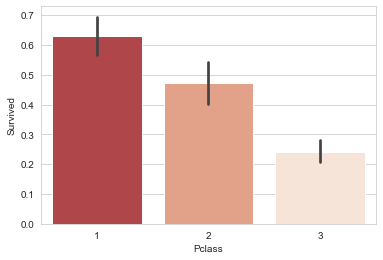

In [7]:
sns.barplot(x = 'Pclass', y = 'Survived', data = train)

#### Observations:
- Majority of people are in class 3 which has the lowest chance to survive. Meanwhile, people in upper class are more likely to survive.

### 2.2 Deep Dive: Gender

In [8]:
for key, df in train_x.groupby('Sex'):
    print('The number of class {} is {}, {}% of the training sample'.format(key, df.shape[0], round(df.shape[0]/train_x.shape[0], 5)*100))

The number of class female is 314, 35.241% of the training sample
The number of class male is 577, 64.759% of the training sample


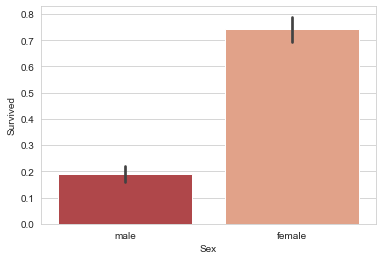

In [9]:
sns.barplot(x = 'Sex', y = 'Survived', data = train)

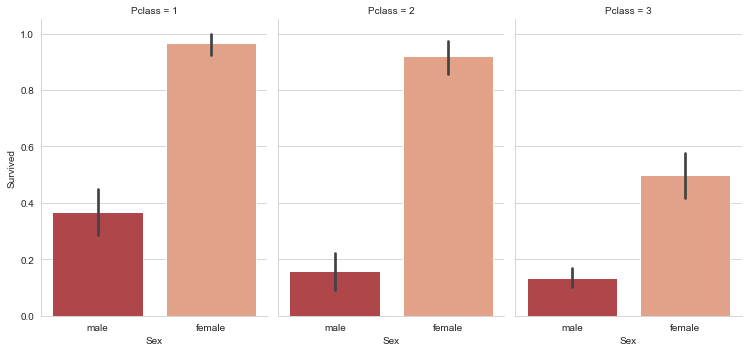

In [10]:
g = sns.catplot(x="Sex", y="Survived", col="Pclass", data=train, kind="bar", size = 5, height=4, aspect=.7)

#### Observations:
- About one third of samples in training set are men. It's not surprising to find that lot's of men gave the opportunities to women. 
- Female has a much higher chance to survive in class 1 and class 2. Male in class 1 has two times possibility to survive.

### 2.3 Deep Dive: Embarked
Embarked represents the port where people get on the ship. C = Cherbourg, Q = Queenstown, S = Southampton. 

In [11]:
for key, df in train_x.groupby('Embarked'):
    print('The number of class {} is {}, {}% of the training sample'.format(key, df.shape[0], round(df.shape[0]/train_x.shape[0], 4)*100))

The number of class C is 168, 18.86% of the training sample
The number of class Q is 77, 8.64% of the training sample
The number of class S is 644, 72.28% of the training sample


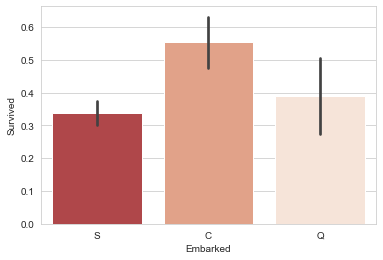

In [12]:
sns.barplot(x = 'Embarked', y = 'Survived', data = train)

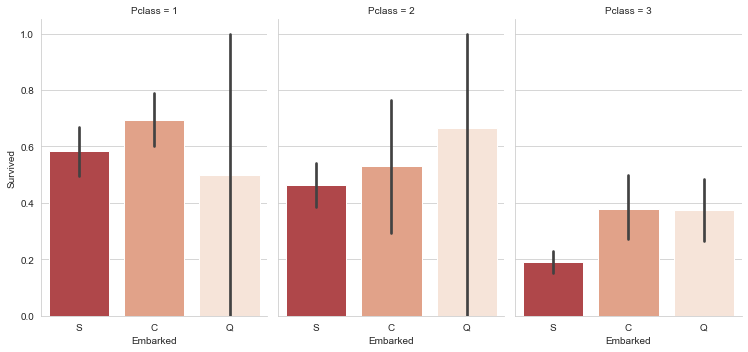

In [13]:
g = sns.catplot(x="Embarked", y="Survived", col="Pclass", data=train, kind="bar", size = 5, height=4, aspect=.7)

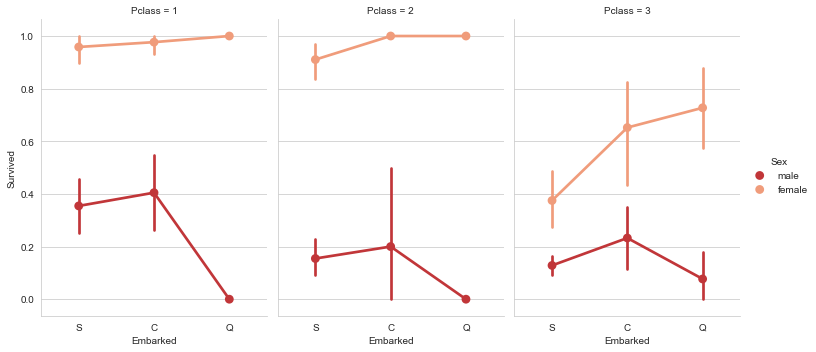

In [14]:
g = sns.catplot(x="Embarked", y="Survived", hue = 'Sex', col="Pclass", data=train, kind="point", size = 5, height=4, aspect=.7)

#### Observations:
- It's clear that peoeple embarked at C has a significantly higher possibility to survive.
- People in class 3, embarked at S has a lower chance to get survived.
- For female, people embarked at S, has a relatively lower chance to survive. while for male, people embarked at Q has a relatively lower survival rate. 

### 2.4 Deep Dive: Age & Fare

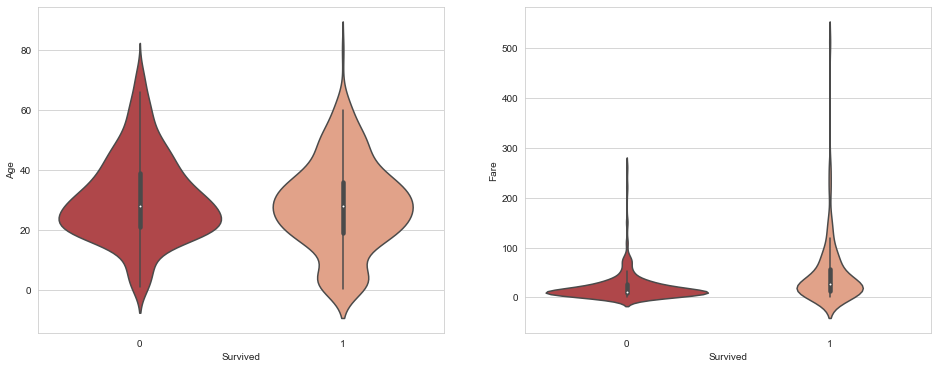

In [15]:
fig, ax = plt.subplots(ncols = 2, figsize = (16, 6))
sns.violinplot(x = 'Survived', y = 'Age', data = train, kind = 'violin', ax = ax[0])
sns.violinplot(x = 'Survived', y = 'Fare', data = train, kind = 'violin', ax = ax[1])

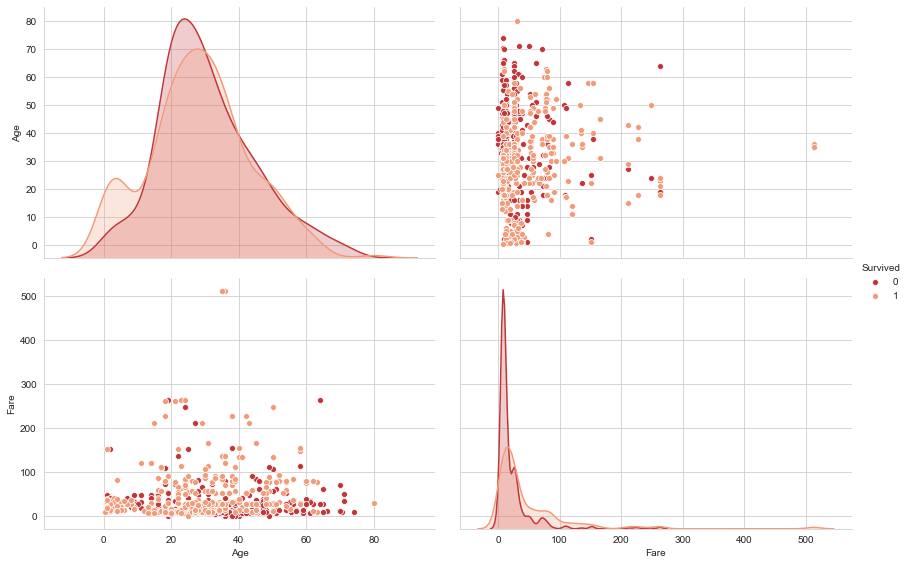

In [16]:
sns.pairplot(train, vars = ['Age', 'Fare'], hue="Survived", height=4, aspect = 1.5)

#### Observations:
- Most people are young and middle aged people.
- Passengers lower than 15 years old has a significantly higher chance to survive while other age doesn't show difference.
- People who buy ticket with higher price are more likely to survive

### 2.5 Deep Dive: SibSp & Parch

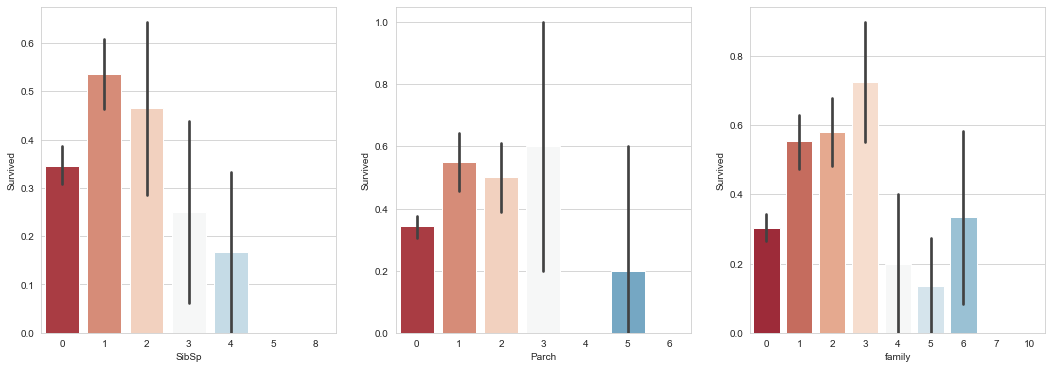

In [17]:
train['family'] = train['SibSp'] + train['Parch']
fig, ax = plt.subplots(ncols = 3, figsize = (18, 6))
sns.barplot(x = 'SibSp', y = 'Survived', data = train, palette = 'RdBu', ax = ax[0])
sns.barplot(x = 'Parch', y = 'Survived', data = train, palette = 'RdBu', ax = ax[1])
sns.barplot(x = 'family', y = 'Survived', data = train, palette = 'RdBu', ax = ax[2])

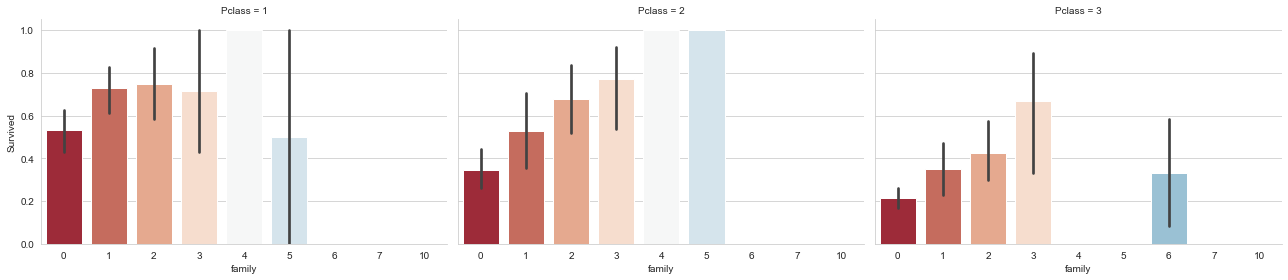

In [18]:
sns.catplot(x = 'family', y = 'Survived', col = 'Pclass', kind = 'bar', data = train, height = 4, aspect = 1.5, palette = 'RdBu')

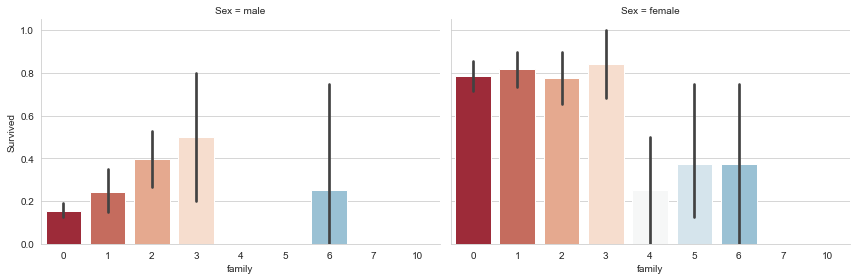

In [19]:
sns.catplot(x = 'family', y = 'Survived', col = 'Sex', kind = 'bar', data = train, height = 4, aspect = 1.5, palette = 'RdBu')

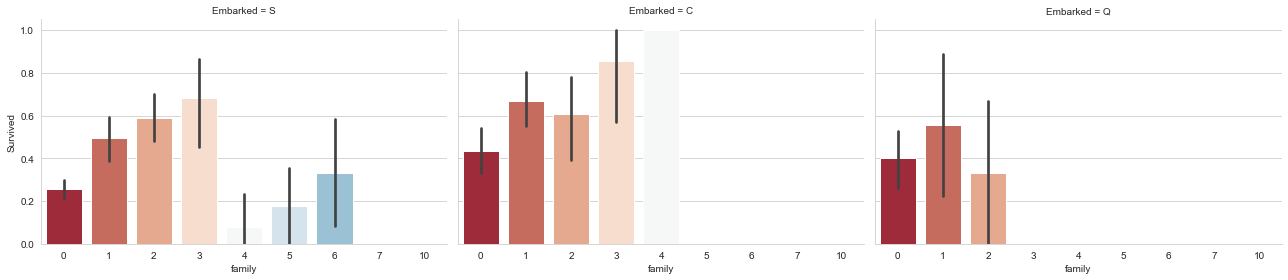

In [20]:
sns.catplot(x = 'family', y = 'Survived', col = 'Embarked', kind = 'bar', data = train, height = 4, aspect = 1.5, palette = 'RdBu')

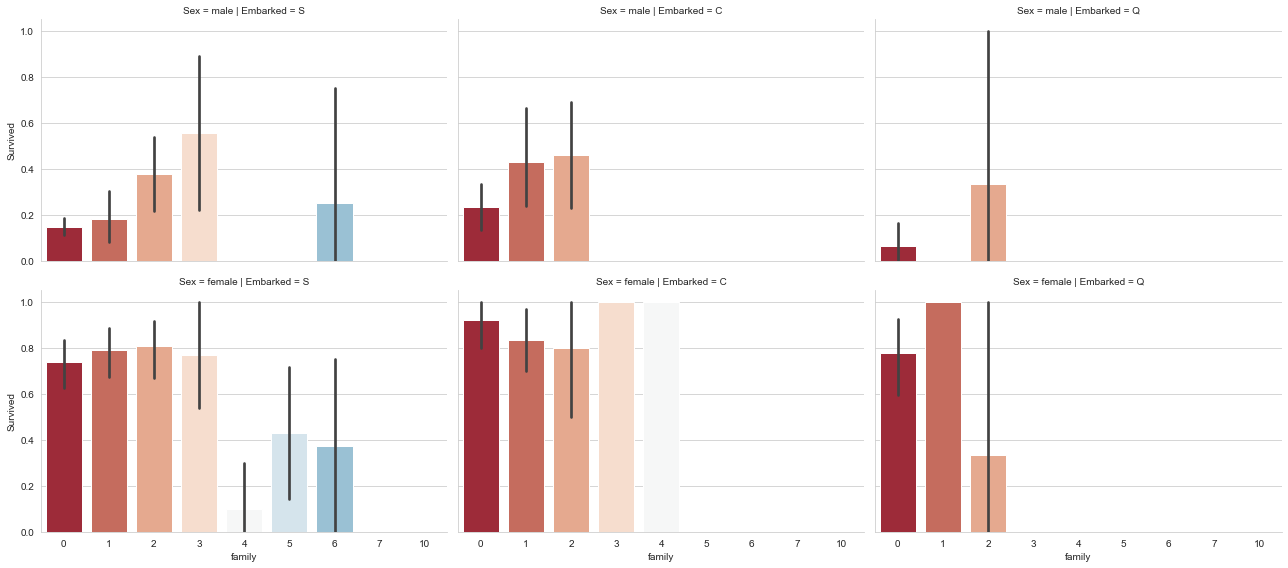

In [21]:
sns.catplot(x = 'family', y = 'Survived', row = 'Sex', col = 'Embarked', kind = 'bar', data = train, height = 4, aspect = 1.5, palette = 'RdBu')

#### Observations:
- We can find people with different family members have different survival rate.
- For female, there is no difference when she has 0-3 family members. But for male, the result is totally different.
- We cannot find other contributes if we intersect it with Embarked and Pclass